1. Perform data preparations to clean data
2. Exploratory Data Analysis (explore the distributions and characteristics of the columns and compare variables to view their behavior and relationships)
3. Cluster the data using K-Means, Hierarchical Clustering
4. Create a prediction model using any classification algorithm and compare the results
5. Submit your result through Github with the code run and showing results

<h3>Import Module</h3>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from kneed import KneeLocator
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


<h3>Import Dataset</h3>

In [2]:
url = "https://raw.githubusercontent.com/Keipatr/student-prediction-analysis/main/data.csv"
df = pd.read_csv(url,delimiter=";")
df.head()

<h3>Data Cleaning and Preparation</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

<h5>Check Missing Value</h5>

In [ ]:
missing_values = df.isnull().any()
total_missing = df.isnull().sum().sum()
print(f"Total Missing Values: {total_missing}\n")

print("Missing Values:")
print(missing_values)

Total Missing Values: 0

Missing Values:
Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender 

<h5>Check Duplicate Value</h5>

In [ ]:
duplicate_rows = df[df.duplicated()]
total_duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {total_duplicates}\n")

print("Duplicate Rows:")
print(duplicate_rows)

Total Duplicate Rows: 0

Duplicate Rows:
Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance	, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Curricular units 1st sem (credited), Curricular units 1st sem (enrolled), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (grade), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (enrolled), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (grade), Curricular units 2nd sem (without evaluations), Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x

<h5>Label Encode</h5>

In [ ]:
label_encoder = LabelEncoder()
df_encode = df.copy()
df_encode['Target'] = label_encoder.fit_transform(df_encode['Target'])
df_encode.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


<h5>Scaling</h5>

In [ ]:
numerical_columns = df_encode.select_dtypes(include=['float64', 'int64']).columns

if 'Target' in numerical_columns:
    numerical_columns = numerical_columns.drop(['Target'])

scaler = StandardScaler()

df_scaled = df_encode.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_scaled[numerical_columns])

df_scaled.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199,2
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761,0
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511,2
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199,2


<h3>EDA</h3>

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


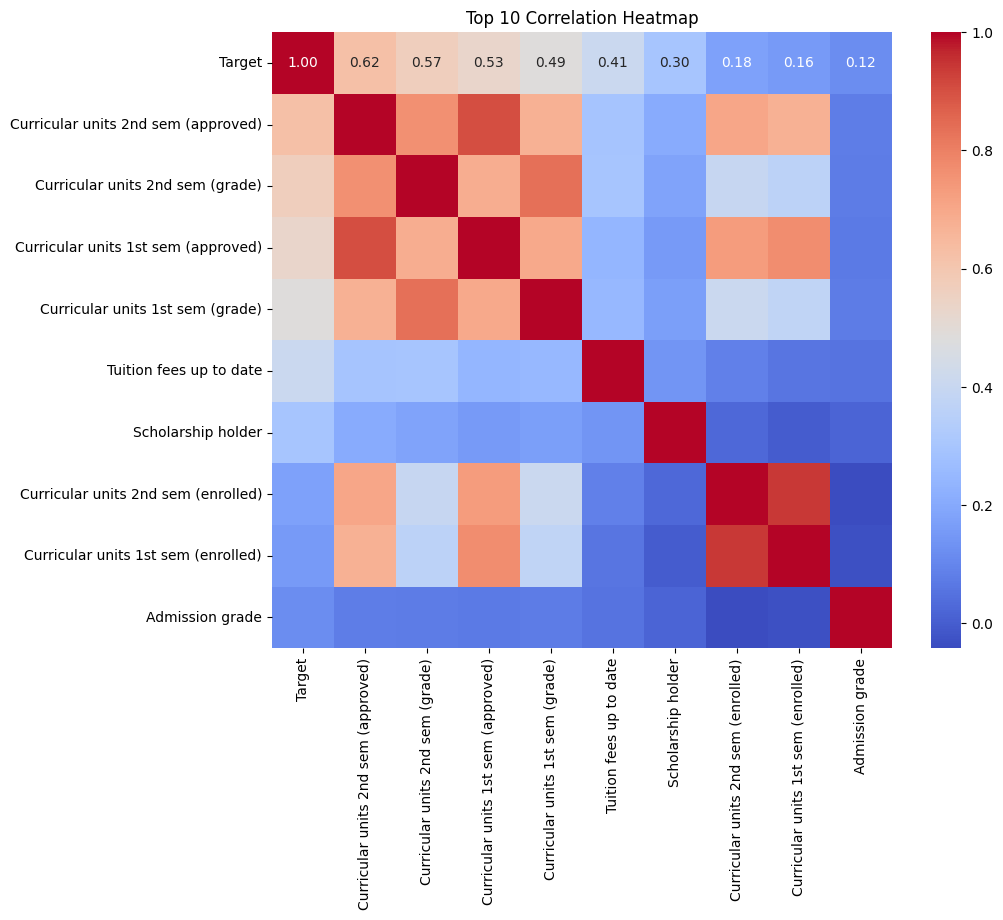

In [ ]:
top_corr_columns =  df_scaled.corr().nlargest(10, 'Target')['Target'].index
top_corr_matrix = df_scaled[top_corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Correlation Heatmap')
plt.show()


c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Figure size 1000x800 with 0 Axes>

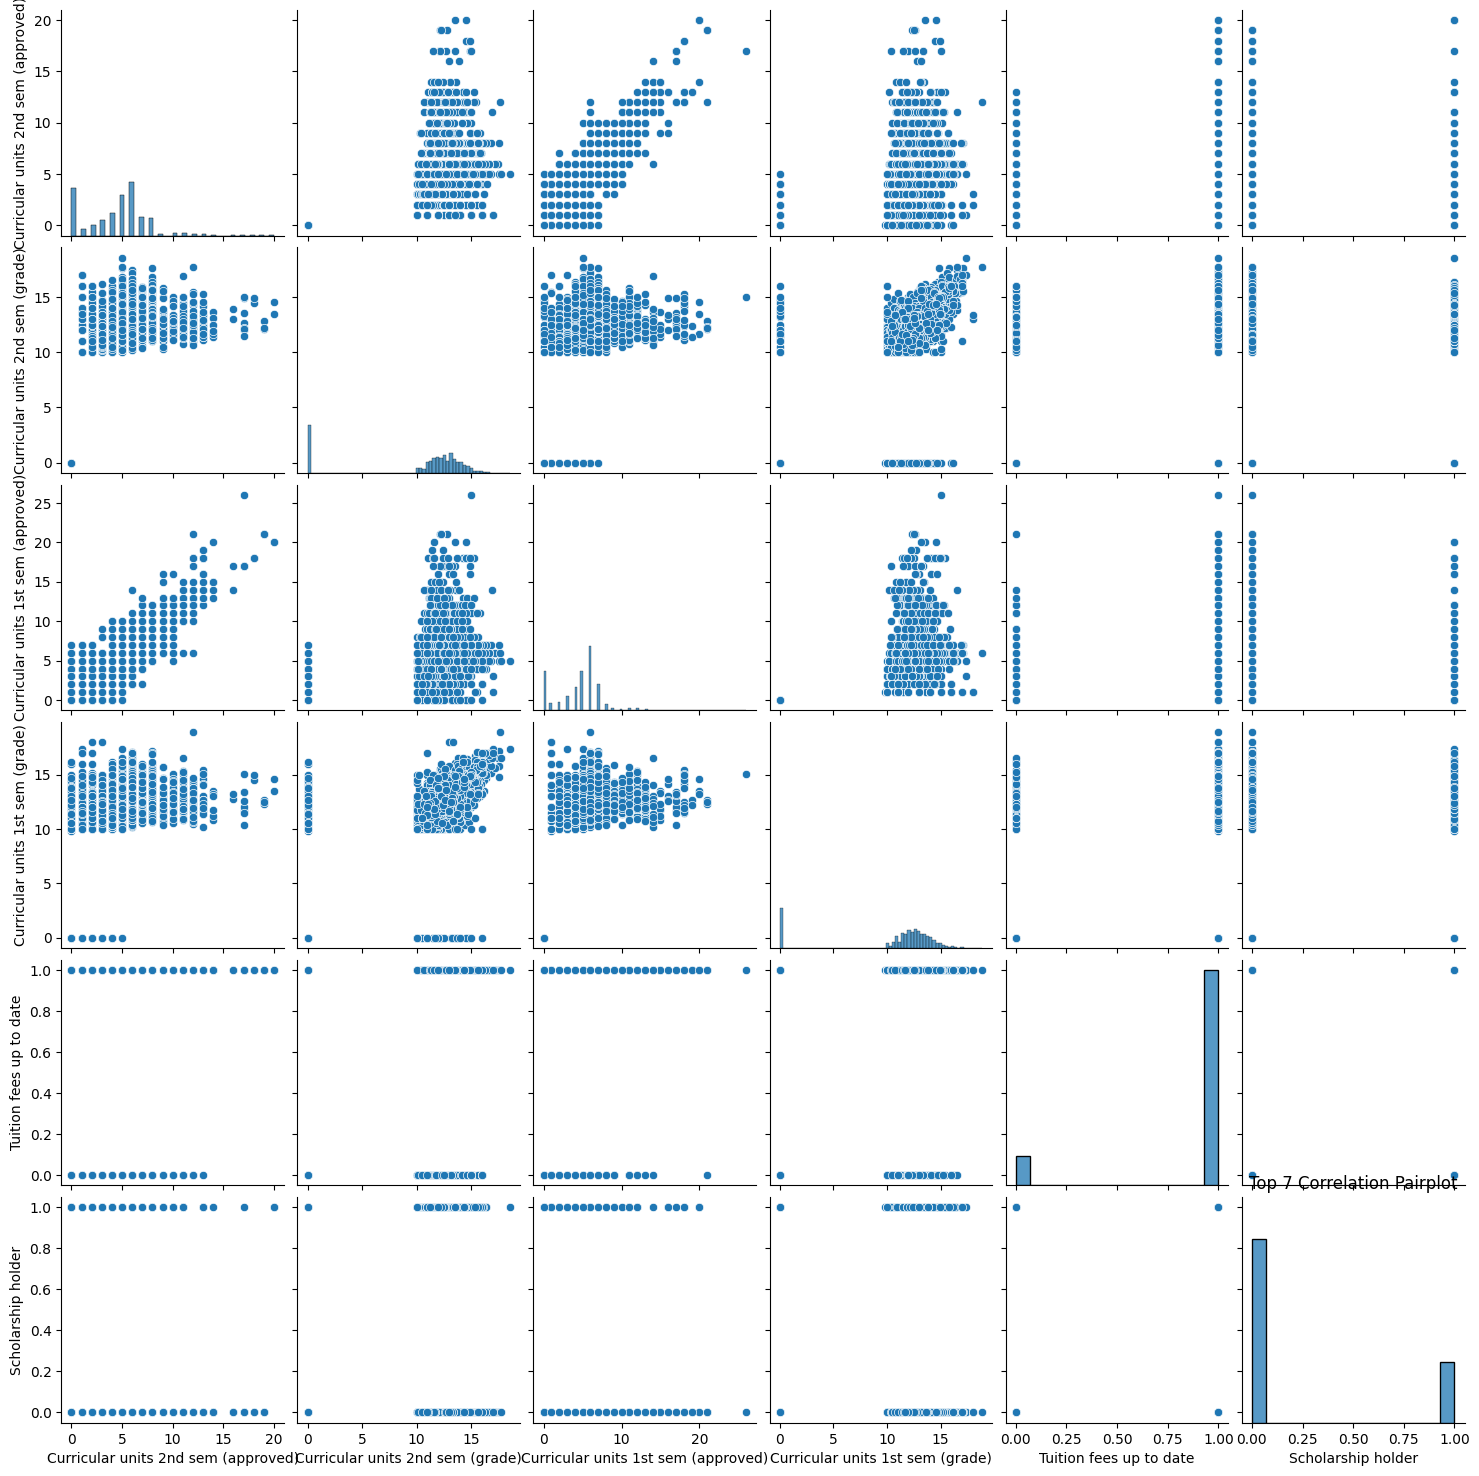

In [ ]:
top_corr_columns =  df_scaled.corr().nlargest(7, 'Target')['Target'].index
top_corr_matrix = df_scaled[top_corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.pairplot(df[top_corr_columns])
plt.title("Top 7 Correlation Pairplot")
plt.show()

c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


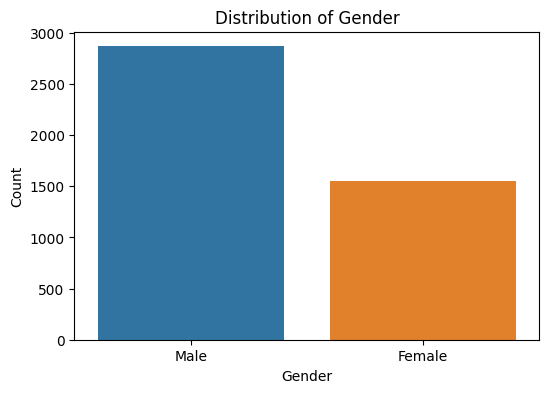

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

- 0 = Male
- 1 = Female

c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


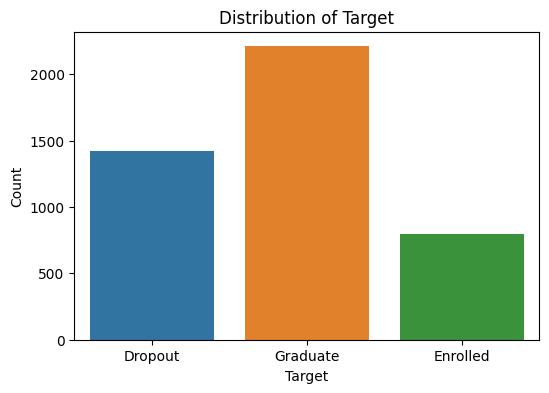

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age at enrollment'], kde=True)
plt.title('Distribution of Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.show()

c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


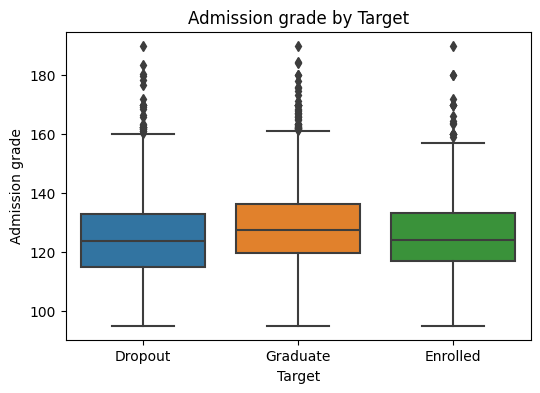

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Target', y='Admission grade', data=df)
plt.title('Admission grade by Target')
plt.xlabel('Target')
plt.ylabel('Admission grade')
plt.show()

c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\tugas\anaconda3\envs\piton\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

AttributeError: 'numpy.int64' object has no attribute 'startswith'

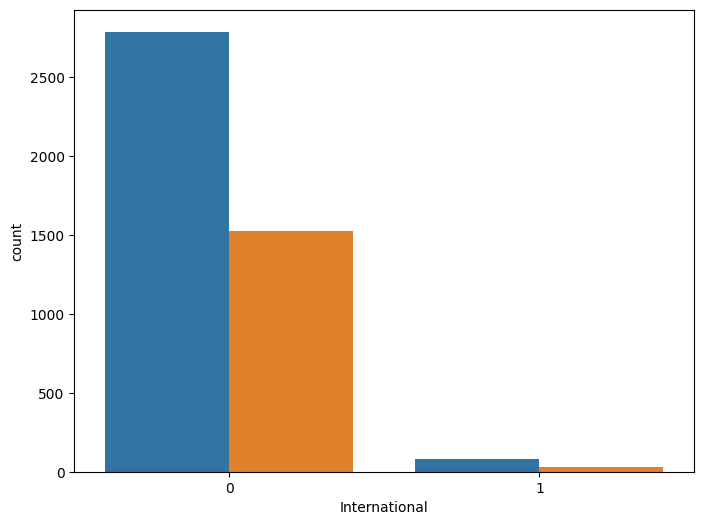

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='International', hue='Gender', data=df)
plt.title('International vs. Gender')
plt.xlabel('International Student Status')
plt.xticks(ticks=[0, 1], labels=['Non International', 'International'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

- 0 = Non International
- 1 = International

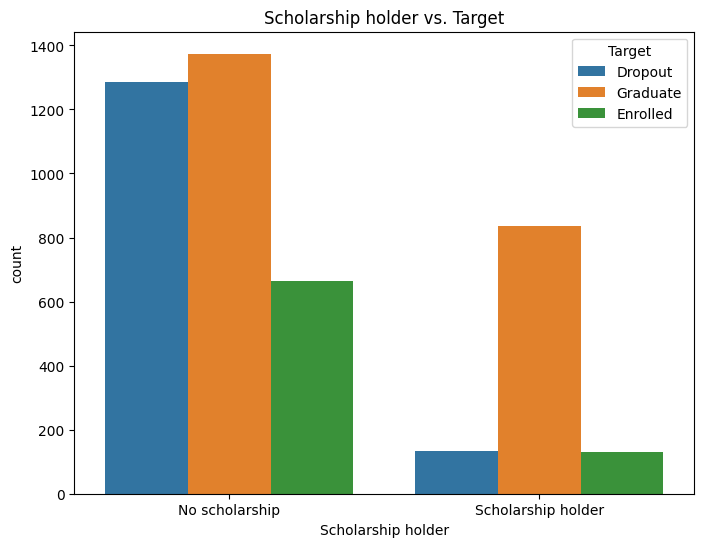

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Scholarship holder', hue='Target', data=df)
plt.title('Scholarship holder vs. Target')
plt.xticks(ticks=[0, 1], labels=['No scholarship', 'Scholarship holder'])
plt.show()

- 0 = No scholarship
- 1 = Scholarship Holder

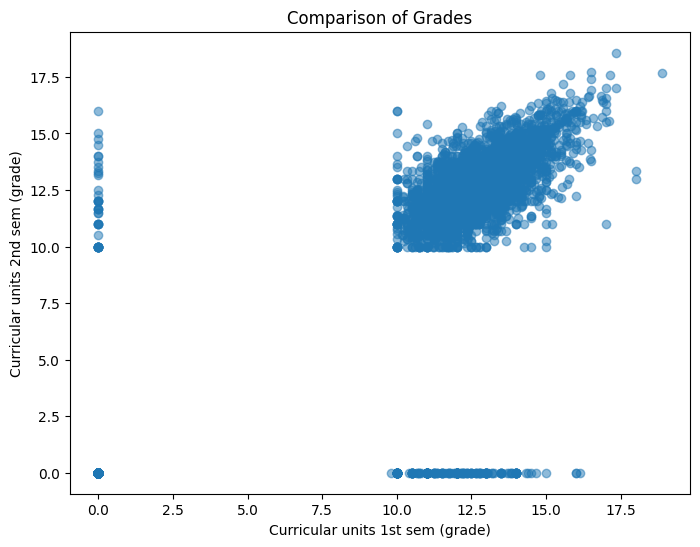

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['Curricular units 1st sem (grade)'], y=df['Curricular units 2nd sem (grade)'],
            alpha=0.5)
plt.xlabel('Curricular units 1st sem (grade)')
plt.ylabel('Curricular units 2nd sem (grade)')
plt.title('Comparison of Grades')
plt.show()

<h3>Clustering</h3>

In [ ]:
# df_cluster = df_scaled.drop(['Target'],axis=1)
df_cluster = df_scaled.copy()

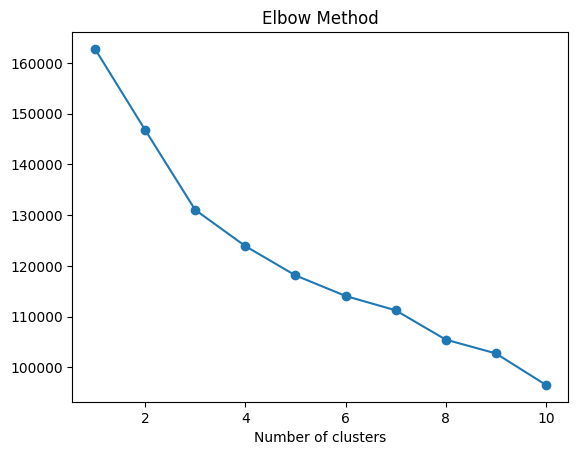

best cluster: 3


In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto',random_state=42)
    kmeans.fit(df_cluster)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

findknee = KneeLocator(range(1, 11),
                       sse,
                       curve="convex",
                       direction="decreasing")

print('best cluster:', findknee.elbow)


In [ ]:
best_kmeans = KMeans(n_clusters=findknee.elbow,n_init='auto',random_state=42)
best_kmeans.fit(df_cluster)
df['Kmeans Cluster'] = best_kmeans.labels_

In [ ]:
aggregation_dict = {
    'Gender': lambda x: x.mode().iloc[0],
    'Marital status': lambda x: x.mode().iloc[0],  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'International': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Kmeans Cluster').agg(aggregation_dict)
cluster_summary['Scholarship holder'] = cluster_summary['Scholarship holder'].map({0: 'Non Scholarship', 1: 'Scholarship Holder'})
cluster_summary['International'] = cluster_summary['International'].map({0: 'Non International', 1: 'International'})
cluster_summary['Gender'] = cluster_summary['Gender'].map({0: 'Male', 1: 'Female'})
cluster_summary

,Gender,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Kmeans Cluster,,,,,,,,,,,,,,,
0,Male,1,16.237085,4.080873,126.939852,1,No scholarship,Non International,21.996310,5.277675,12.741707,5.147909,12.616993,0.068595,Graduate
1,Male,1,33.081851,9.622776,129.246975,1,No scholarship,Non International,28.729537,11.576512,12.632019,9.896797,12.649831,0.019217,Graduate
2,Female,1,23.000000,4.800224,126.402245,1,No scholarship,Non International,26.172840,0.455668,2.344969,0.114478,0.755743,-0.246644,Dropout


<function matplotlib.pyplot.show(close=None, block=None)>

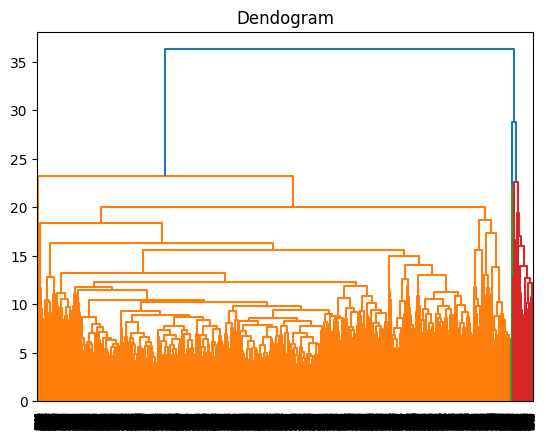

In [ ]:
dist_matrix = sch.linkage(df_scaled, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

In [ ]:
hc = AgglomerativeClustering(n_clusters=findknee.elbow, metric='euclidean')
y_hc = hc.fit_predict(df_scaled)
df["Hierarchical Cluster"] = y_hc

In [ ]:
aggregation_dict = {
    'Gender': lambda x: x.mode().iloc[0],
    'Marital status': lambda x: x.mode().iloc[0],  
    'Application mode': 'mean',  
    'Previous qualification': 'mean', 
    'Admission grade': 'mean',
    'Tuition fees up to date': lambda x: x.mode().iloc[0],
    'Scholarship holder': lambda x: x.mode().iloc[0],
    'International': lambda x: x.mode().iloc[0],
    'Age at enrollment': 'mean', 
    'Curricular units 1st sem (approved)': 'mean',
    'Curricular units 1st sem (grade)': 'mean', 
    'Curricular units 2nd sem (approved)': 'mean',
    'Curricular units 2nd sem (grade)': 'mean', 
    'GDP': 'mean', 
    'Target': lambda x: x.mode().iloc[0]  
}
cluster_summary = df.groupby('Hierarchical Cluster').agg(aggregation_dict)
cluster_summary['Scholarship holder'] = cluster_summary['Scholarship holder'].map({0: 'Non Scholarship', 1: 'Scholarship Holder'})
cluster_summary['International'] = cluster_summary['International'].map({0: 'Non International', 1: 'International'})
cluster_summary['Gender'] = cluster_summary['Gender'].map({0: 'Male', 1: 'Female'})
cluster_summary

,Gender,Marital status,Application mode,Previous qualification,Admission grade,Tuition fees up to date,Scholarship holder,International,Age at enrollment,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
Hierarchical Cluster,,,,,,,,,,,,,,,
0,Male,1,17.080450,4.319493,126.845069,1,No scholarship,Non International,22.525952,5.051615,12.256899,4.895905,11.997655,0.067261,Graduate
1,Male,1,32.881226,8.172414,129.620690,1,No scholarship,Non International,28.804598,11.616858,12.663811,9.923372,12.688296,-0.053372,Graduate
2,Female,1,21.258993,4.516547,126.649640,1,No scholarship,Non International,24.873381,0.389928,1.816997,0.079137,0.487650,-0.303050,Dropout


<h3>Classification</h3>

In [ ]:
df_class = df_scaled.copy()

In [ ]:
X = df_class.drop(['Target'], axis=1)  # Features
y = df_class['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(rf_pred)

comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})

rf_accuracy = accuracy_score(y_test, rf_pred)  
conf_matrix_rf = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(conf_matrix_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
comparison_df.sample(n=10)

Confusion Matrix:
[[290  29  55]
 [ 53  66  78]
 [ 10  27 498]]
Random Forest Accuracy: 0.7722


,Actual,Predicted
540,Graduate,Graduate
684,Dropout,Dropout
885,Dropout,Dropout
382,Dropout,Dropout
437,Enrolled,Dropout
347,Graduate,Graduate
238,Graduate,Graduate
900,Enrolled,Graduate
183,Dropout,Dropout
637,Dropout,Enrolled


In [ ]:
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

log_reg_accuracy = accuracy_score(y_test, logistic_pred)
conf_matrix = confusion_matrix(y_test, logistic_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {log_reg_accuracy:.4f}")

actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(logistic_pred)

comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
comparison_df.sample(n=10)


Confusion Matrix:
[[289  34  51]
 [ 53  57  87]
 [ 15  31 489]]
Accuracy: 0.7550


,Actual,Predicted
440,Graduate,Graduate
156,Graduate,Graduate
112,Graduate,Graduate
863,Dropout,Dropout
814,Dropout,Dropout
677,Enrolled,Graduate
243,Enrolled,Dropout
530,Dropout,Dropout
1023,Graduate,Graduate
893,Dropout,Dropout


In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

tree_accuracy = accuracy_score(y_test, tree_pred)
conf_matrix = confusion_matrix(y_test, tree_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {tree_accuracy:.4f}")

actual_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(tree_pred)

comparison_df = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
comparison_df.sample(n=10) 

Confusion Matrix:
[[254  70  50]
 [ 60  71  66]
 [ 34  72 429]]
Accuracy: 0.6817


,Actual,Predicted
526,Dropout,Dropout
737,Dropout,Dropout
432,Graduate,Graduate
431,Dropout,Dropout
1030,Enrolled,Enrolled
892,Enrolled,Enrolled
430,Dropout,Dropout
575,Graduate,Graduate
727,Dropout,Dropout
906,Graduate,Graduate


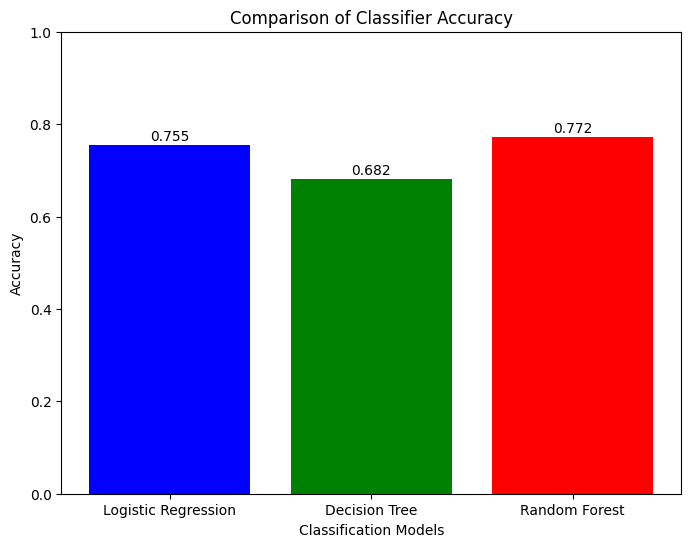

In [ ]:
accuracies = [log_reg_accuracy, tree_accuracy, rf_accuracy]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', color='black', fontsize=10)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracy')
plt.ylim(0, 1)
plt.show()